# ADS Chappa

Importing packages

In [203]:
import numpy as np
import pandas as pd

Reading file

In [204]:
data = pd.read_csv('Customer_Sales_Transactional_Data_CSV.csv')

In [205]:
df = data.copy()

In [206]:
df.head()

,SALES_dATE,CUSTOMER_ID,SALES_AMOUNT
0,10/18/2014,34810920,205.44
1,9/22/2014,1026037818,51.36
2,9/30/2014,1095693062,222.56
3,10/25/2014,15142688,171.20
4,10/18/2014,1022245368,171.20


Converting Sales_Date to datetime format


In [207]:
df['SALES_DATE'] = ''

In [208]:
df.loc[:, ('SALES_DATE')] = pd.to_datetime(df['SALES_dATE'])

In [209]:
df.drop('SALES_dATE', axis=1, inplace=True)

In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1058198 entries, 0 to 1058197
Data columns (total 3 columns):
CUSTOMER_ID     1058198 non-null int64
SALES_AMOUNT    1058198 non-null float64
SALES_DATE      1058198 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 24.2 MB


In [211]:
df.head()

,CUSTOMER_ID,SALES_AMOUNT,SALES_DATE
0,34810920,205.44,2014-10-18
1,1026037818,51.36,2014-09-22
2,1095693062,222.56,2014-09-30
3,15142688,171.20,2014-10-25
4,1022245368,171.20,2014-10-18


Calculating weeks

In [212]:
df['SALES_WEEK'] = pd.DatetimeIndex(df['SALES_DATE']).week

Converting Weeks to 5, 4, 3, 2, 1, and 0 format

In [213]:
df['SALES_WEEK'] = abs((df['SALES_WEEK']%9) - 7)

We need to create following features for each customer on each week:

* Historic_Visits
* Historic_Sales
* STD_SALESAMOUNT
* VARIATION_SALESAMOUNT
* MAX_SALESAMOUNT
* MIN_SALESAMOUNT

Note: In this project we will be creating Churn feature from Week-0

In [214]:
weeks = df.groupby(['CUSTOMER_ID', 'SALES_WEEK']).agg({'SALES_AMOUNT':{'HISTORIC_VISITS': 'count', 'HISTORIC_SALES':'sum', 'STD_SALESAMOUNT':'std', 'VARIATION_SALESAMOUNT':'var', 'MIN_SALESAMOUNT': 'min', 'MAX_SALESAMOUNT': 'max'}}).reset_index()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\groupby\groupby.py:4656: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


In [215]:
weeks.columns = weeks.columns.droplevel(0)

In [216]:
weeks.columns

Index(['', '', 'HISTORIC_VISITS', 'HISTORIC_SALES', 'STD_SALESAMOUNT',
       'VARIATION_SALESAMOUNT', 'MIN_SALESAMOUNT', 'MAX_SALESAMOUNT'],
      dtype='object')

In [217]:
weeks.columns = ['CUSTOMER_ID', 'WEEK', 'HISTORIC_VISITS', 'HISTORIC_SALES', 'STD_SALESAMOUNT',
       'VARIATION_SALESAMOUNT', 'MIN_SALESAMOUNT', 'MAX_SALESAMOUNT']

In [218]:
weeks.head()

,CUSTOMER_ID,WEEK,HISTORIC_VISITS,HISTORIC_SALES,STD_SALESAMOUNT,VARIATION_SALESAMOUNT,MIN_SALESAMOUNT,MAX_SALESAMOUNT
0,488,3,1,171.20,NaN,NaN,171.20,171.20
1,5194,2,1,599.20,NaN,NaN,599.20,599.20
2,5398,0,1,51.36,NaN,NaN,51.36,51.36
3,5398,2,1,51.36,NaN,NaN,51.36,51.36
4,5398,4,1,51.36,NaN,NaN,51.36,51.36


In [219]:
weeks = weeks.pivot(index='CUSTOMER_ID', columns='WEEK')

In [220]:
weeks.head()

HISTORIC_VISITS                          HISTORIC_SALES          \
WEEK                      0    1    2    3    4    5              0       1   
CUSTOMER_ID                                                                   
488                     NaN  NaN  NaN  1.0  NaN  NaN            NaN     NaN   
5194                    NaN  NaN  1.0  NaN  NaN  NaN            NaN     NaN   
5398                    1.0  NaN  1.0  NaN  1.0  NaN          51.36     NaN   
6930                    3.0  1.0  2.0  1.0  2.0  NaN         256.80   85.60   
7260                    2.0  4.0  3.0  4.0  2.0  1.0         256.80  582.08   

                            ...   MIN_SALESAMOUNT                       \
WEEK              2      3  ...                 2      3      4      5   
CUSTOMER_ID                 ...                                          
488             NaN  171.2  ...               NaN  171.2    NaN    NaN   
5194         599.20    NaN  ...            599.20    NaN    NaN    NaN   
5398          51.36    NaN  ...             51.36    NaN  51.36    NaN   
6930         256.80   85.6  ...             85.60   85.6  85.60    NaN   
7260         445.12  513.6  ...            136.96   85.6  85.60  171.2   

            MAX_SALESAMOUNT                                       
WEEK                      0      1       2      3       4      5  
CUSTOMER_ID                                                       
488                     NaN    NaN     NaN  171.2     NaN    NaN  
5194                    NaN    NaN  599.20    NaN     NaN    NaN  
5398                  51.36    NaN   51.36    NaN   51.36    NaN  
6930                  85.60   85.6  171.20   85.6   85.60    NaN  
7260                 171.20  171.2  171.20  256.8  171.20  171.2  

[5 rows x 36 columns]

In [221]:
weeks.columns

MultiIndex(levels=[['HISTORIC_VISITS', 'HISTORIC_SALES', 'STD_SALESAMOUNT', 'VARIATION_SALESAMOUNT', 'MIN_SALESAMOUNT', 'MAX_SALESAMOUNT'], [0, 1, 2, 3, 4, 5]],
           labels=[[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5], [0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5]],
           names=[None, 'WEEK'])

In [222]:
weeks.columns.droplevel()

Int64Index([0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3,
            4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5],
           dtype='int64', name='WEEK')

In [223]:
weeks.columns = weeks.columns.droplevel()

In [224]:
weeks.columns

Int64Index([0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3,
            4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5],
           dtype='int64', name='WEEK')

In [225]:
weeks.columns = ['W0_HISTORIC_VISITS', 'W1_HISTORIC_VISITS', 'W2_HISTORIC_VISITS', 'W3_HISTORIC_VISITS', 'W4_HISTORIC_VISITS', 'W5_HISTORIC_VISITS', 'W0_HISTORIC_SALES', 'W1_HISTORIC_SALES', 'W2_HISTORIC_SALES', 'W3_HISTORIC_SALES', 'W4_HISTORIC_SALES', 'W5_HISTORIC_SALES', 'W0_STD_SALESAMOUNT', 'W1_STD_SALESAMOUNT', 'W2_STD_SALESAMOUNT', 'W3_STD_SALESAMOUNT', 'W4_STD_SALESAMOUNT', 'W5_STD_SALESAMOUNT', 'W0_VARIATION_SALES_AMOUNT', 'W1_VARIATION_SALES_AMOUNT', 'W2_VARIATION_SALES_AMOUNT', 'W3_VARIATION_SALES_AMOUNT', 'W4_VARIATION_SALES_AMOUNT', 'W5_VARIATION_SALES_AMOUNT', 'W0_MIN_SALESAMOUNT', 'W1_MIN_SALESAMOUNT', 'W2_MIN_SALESAMOUNT', 'W3_MIN_SALESAMOUNT', 'W4_MIN_SALESAMOUNT', 'W5_MIN_SALESAMOUNT', 'W0_MAX_SALESAMOUNT', 'W1_MAX_SALESAMOUNT', 'W2_MAX_SALESAMOUNT', 'W3_MAX_SALESAMOUNT', 'W4_MAX_SALESAMOUNT', 'W5_MAX_SALESAMOUNT']
weeks.head()

,W0_HISTORIC_VISITS,W1_HISTORIC_VISITS,W2_HISTORIC_VISITS,W3_HISTORIC_VISITS,W4_HISTORIC_VISITS,W5_HISTORIC_VISITS,W0_HISTORIC_SALES,W1_HISTORIC_SALES,W2_HISTORIC_SALES,W3_HISTORIC_SALES,...,W2_MIN_SALESAMOUNT,W3_MIN_SALESAMOUNT,W4_MIN_SALESAMOUNT,W5_MIN_SALESAMOUNT,W0_MAX_SALESAMOUNT,W1_MAX_SALESAMOUNT,W2_MAX_SALESAMOUNT,W3_MAX_SALESAMOUNT,W4_MAX_SALESAMOUNT,W5_MAX_SALESAMOUNT
CUSTOMER_ID,,,,,,,,,,,,,,,,,,,,,
488,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,171.2,...,NaN,171.2,NaN,NaN,NaN,NaN,NaN,171.2,NaN,NaN
5194,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,599.20,NaN,...,599.20,NaN,NaN,NaN,NaN,NaN,599.20,NaN,NaN,NaN
5398,1.0,NaN,1.0,NaN,1.0,NaN,51.36,NaN,51.36,NaN,...,51.36,NaN,51.36,NaN,51.36,NaN,51.36,NaN,51.36,NaN
6930,3.0,1.0,2.0,1.0,2.0,NaN,256.80,85.60,256.80,85.6,...,85.60,85.6,85.60,NaN,85.60,85.6,171.20,85.6,85.60,NaN
7260,2.0,4.0,3.0,4.0,2.0,1.0,256.80,582.08,445.12,513.6,...,136.96,85.6,85.60,171.2,171.20,171.2,171.20,256.8,171.20,171.2


In [226]:
weeks[['W1_HISTORIC_VISITS', 'W1_HISTORIC_SALES', 'W1_STD_SALESAMOUNT', 'W1_VARIATION_SALES_AMOUNT', 'W1_MIN_SALESAMOUNT', 'W1_MAX_SALESAMOUNT']].head()

,W1_HISTORIC_VISITS,W1_HISTORIC_SALES,W1_STD_SALESAMOUNT,W1_VARIATION_SALES_AMOUNT,W1_MIN_SALESAMOUNT,W1_MAX_SALESAMOUNT
CUSTOMER_ID,,,,,,
488,NaN,NaN,NaN,NaN,NaN,NaN
5194,NaN,NaN,NaN,NaN,NaN,NaN
5398,NaN,NaN,NaN,NaN,NaN,NaN
6930,1.0,85.60,NaN,NaN,85.60,85.6
7260,4.0,582.08,51.36,2637.8496,68.48,171.2


In addition to each week feature, we also need below overall features against each customer:

* Historic_Visits
* Historic_Sales
* STD_SALESAMOUNT
* VARIATION_SALESAMOUNT
* MAX_SALESAMOUNT
* MIN_SALESAMOUNT
* FIRST_VISIT
* LAST_VISIT

Note: These features will be calculated on Week-5 to Week-1, we will not include Week-0 as we are deriving CHURN feature from it

In [227]:
overall_detail = df[df['SALES_WEEK'] > 0].groupby('CUSTOMER_ID').agg({'SALES_AMOUNT': {'HISTORIC_VISITS': 'count', 'HISTORIC_SALES': 'sum', 'STD_SALESAMOUNT': 'std', 'VARIATION_SALESAMOUNT': 'var', 'MAX_SALESAMOUNT': 'max', 'MIN_SALESAMOUNT': 'min'}, 'SALES_DATE':{'LAST_VISIT': 'max', 'FIRST_VISIT': 'min'}})

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\groupby\groupby.py:4656: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


In [228]:
overall_detail.head()

SALES_AMOUNT                                 \
            HISTORIC_VISITS HISTORIC_SALES STD_SALESAMOUNT   
CUSTOMER_ID                                                  
488                       1         171.20             NaN   
5194                      1         599.20             NaN   
5398                      2         102.72        0.000000   
6930                      6         599.20       34.946054   
7260                     14        1968.80       52.950181   

                                                                  SALES_DATE  \
            VARIATION_SALESAMOUNT MAX_SALESAMOUNT MIN_SALESAMOUNT LAST_VISIT   
CUSTOMER_ID                                                                    
488                           NaN          171.20          171.20 2014-10-03   
5194                          NaN          599.20          599.20 2014-10-09   
5398                     0.000000           51.36           51.36 2014-10-07   
6930                  1221.226667          171.20           85.60 2014-10-15   
7260                  2803.721705          256.80           68.48 2014-10-19   

                         
            FIRST_VISIT  
CUSTOMER_ID              
488          2014-10-03  
5194         2014-10-09  
5398         2014-09-23  
6930         2014-09-25  
7260         2014-09-19

In [229]:
overall_detail.columns

MultiIndex(levels=[['SALES_AMOUNT', 'SALES_DATE'], ['FIRST_VISIT', 'HISTORIC_SALES', 'HISTORIC_VISITS', 'LAST_VISIT', 'MAX_SALESAMOUNT', 'MIN_SALESAMOUNT', 'STD_SALESAMOUNT', 'VARIATION_SALESAMOUNT']],
           labels=[[0, 0, 0, 0, 0, 0, 1, 1], [2, 1, 6, 7, 4, 5, 3, 0]])

In [230]:
overall_detail.columns.droplevel()

Index(['HISTORIC_VISITS', 'HISTORIC_SALES', 'STD_SALESAMOUNT',
       'VARIATION_SALESAMOUNT', 'MAX_SALESAMOUNT', 'MIN_SALESAMOUNT',
       'LAST_VISIT', 'FIRST_VISIT'],
      dtype='object')

In [231]:
overall_detail.columns = overall_detail.columns.droplevel()

In [232]:
overall_detail.head()

,HISTORIC_VISITS,HISTORIC_SALES,STD_SALESAMOUNT,VARIATION_SALESAMOUNT,MAX_SALESAMOUNT,MIN_SALESAMOUNT,LAST_VISIT,FIRST_VISIT
CUSTOMER_ID,,,,,,,,
488,1,171.20,NaN,NaN,171.20,171.20,2014-10-03,2014-10-03
5194,1,599.20,NaN,NaN,599.20,599.20,2014-10-09,2014-10-09
5398,2,102.72,0.000000,0.000000,51.36,51.36,2014-10-07,2014-09-23
6930,6,599.20,34.946054,1221.226667,171.20,85.60,2014-10-15,2014-09-25
7260,14,1968.80,52.950181,2803.721705,256.80,68.48,2014-10-19,2014-09-19


In [233]:
overall_detail.reset_index(level=0, inplace=True)

In [234]:
overall_detail.head()

,CUSTOMER_ID,HISTORIC_VISITS,HISTORIC_SALES,STD_SALESAMOUNT,VARIATION_SALESAMOUNT,MAX_SALESAMOUNT,MIN_SALESAMOUNT,LAST_VISIT,FIRST_VISIT
0,488,1,171.20,NaN,NaN,171.20,171.20,2014-10-03,2014-10-03
1,5194,1,599.20,NaN,NaN,599.20,599.20,2014-10-09,2014-10-09
2,5398,2,102.72,0.000000,0.000000,51.36,51.36,2014-10-07,2014-09-23
3,6930,6,599.20,34.946054,1221.226667,171.20,85.60,2014-10-15,2014-09-25
4,7260,14,1968.80,52.950181,2803.721705,256.80,68.48,2014-10-19,2014-09-19


In [235]:
weeks.reset_index(level=0, inplace=True)

In [236]:
weeks.head()

,CUSTOMER_ID,W0_HISTORIC_VISITS,W1_HISTORIC_VISITS,W2_HISTORIC_VISITS,W3_HISTORIC_VISITS,W4_HISTORIC_VISITS,W5_HISTORIC_VISITS,W0_HISTORIC_SALES,W1_HISTORIC_SALES,W2_HISTORIC_SALES,...,W2_MIN_SALESAMOUNT,W3_MIN_SALESAMOUNT,W4_MIN_SALESAMOUNT,W5_MIN_SALESAMOUNT,W0_MAX_SALESAMOUNT,W1_MAX_SALESAMOUNT,W2_MAX_SALESAMOUNT,W3_MAX_SALESAMOUNT,W4_MAX_SALESAMOUNT,W5_MAX_SALESAMOUNT
0,488,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,171.2,NaN,NaN,NaN,NaN,NaN,171.2,NaN,NaN
1,5194,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,599.20,...,599.20,NaN,NaN,NaN,NaN,NaN,599.20,NaN,NaN,NaN
2,5398,1.0,NaN,1.0,NaN,1.0,NaN,51.36,NaN,51.36,...,51.36,NaN,51.36,NaN,51.36,NaN,51.36,NaN,51.36,NaN
3,6930,3.0,1.0,2.0,1.0,2.0,NaN,256.80,85.60,256.80,...,85.60,85.6,85.60,NaN,85.60,85.6,171.20,85.6,85.60,NaN
4,7260,2.0,4.0,3.0,4.0,2.0,1.0,256.80,582.08,445.12,...,136.96,85.6,85.60,171.2,171.20,171.2,171.20,256.8,171.20,171.2


In [237]:
overall_detail.head()

,CUSTOMER_ID,HISTORIC_VISITS,HISTORIC_SALES,STD_SALESAMOUNT,VARIATION_SALESAMOUNT,MAX_SALESAMOUNT,MIN_SALESAMOUNT,LAST_VISIT,FIRST_VISIT
0,488,1,171.20,NaN,NaN,171.20,171.20,2014-10-03,2014-10-03
1,5194,1,599.20,NaN,NaN,599.20,599.20,2014-10-09,2014-10-09
2,5398,2,102.72,0.000000,0.000000,51.36,51.36,2014-10-07,2014-09-23
3,6930,6,599.20,34.946054,1221.226667,171.20,85.60,2014-10-15,2014-09-25
4,7260,14,1968.80,52.950181,2803.721705,256.80,68.48,2014-10-19,2014-09-19


Merging Overall_detail and Weeks dataframes.

Note: Total customers should be 200,000

In [238]:
final = overall_detail.merge(weeks, left_on='CUSTOMER_ID', right_on='CUSTOMER_ID', how='outer')

In [239]:
final.shape

(200000, 45)

Checking missing values

In [240]:
final.isnull().sum()

CUSTOMER_ID                       0
HISTORIC_VISITS                8158
HISTORIC_SALES                 8158
STD_SALESAMOUNT               53666
VARIATION_SALESAMOUNT         53666
MAX_SALESAMOUNT                8158
MIN_SALESAMOUNT                8158
LAST_VISIT                     8158
FIRST_VISIT                    8158
W0_HISTORIC_VISITS            89431
W1_HISTORIC_VISITS            88812
W2_HISTORIC_VISITS            87265
W3_HISTORIC_VISITS            79858
W4_HISTORIC_VISITS            89495
W5_HISTORIC_VISITS           108301
W0_HISTORIC_SALES             89431
W1_HISTORIC_SALES             88812
W2_HISTORIC_SALES             87265
W3_HISTORIC_SALES             79858
W4_HISTORIC_SALES             89495
W5_HISTORIC_SALES            108301
W0_STD_SALESAMOUNT           156644
W1_STD_SALESAMOUNT           155990
W2_STD_SALESAMOUNT           155380
W3_STD_SALESAMOUNT           148376
W4_STD_SALESAMOUNT           156839
W5_STD_SALESAMOUNT           173180
W0_VARIATION_SALES_AMOUNT   

Dealing with dates missing values in FIRST_VISIT and LAST_VISIT.

Note: we are observing these missing values becuase 8158 customers didn't come to store from Week-5 to Week-1, they only came in Week-0, so we are replacing missing values with 19-Oct-2014 (The end date of Week-1)

In [241]:
from datetime import datetime
d0 = datetime(2014,10,19)

In [242]:
final.loc[final['FIRST_VISIT'].isnull(),'FIRST_VISIT']=d0

In [243]:
final.loc[final['LAST_VISIT'].isnull(),'LAST_VISIT']=d0

In [244]:
final.isnull().sum()

CUSTOMER_ID                       0
HISTORIC_VISITS                8158
HISTORIC_SALES                 8158
STD_SALESAMOUNT               53666
VARIATION_SALESAMOUNT         53666
MAX_SALESAMOUNT                8158
MIN_SALESAMOUNT                8158
LAST_VISIT                        0
FIRST_VISIT                       0
W0_HISTORIC_VISITS            89431
W1_HISTORIC_VISITS            88812
W2_HISTORIC_VISITS            87265
W3_HISTORIC_VISITS            79858
W4_HISTORIC_VISITS            89495
W5_HISTORIC_VISITS           108301
W0_HISTORIC_SALES             89431
W1_HISTORIC_SALES             88812
W2_HISTORIC_SALES             87265
W3_HISTORIC_SALES             79858
W4_HISTORIC_SALES             89495
W5_HISTORIC_SALES            108301
W0_STD_SALESAMOUNT           156644
W1_STD_SALESAMOUNT           155990
W2_STD_SALESAMOUNT           155380
W3_STD_SALESAMOUNT           148376
W4_STD_SALESAMOUNT           156839
W5_STD_SALESAMOUNT           173180
W0_VARIATION_SALES_AMOUNT   

In remaining columns, we are observing missing values beacause customer did not purchase anything from Store, so technically Sales was ZERO. Hence replacing remaining missing values with ZERO

In [245]:
final.fillna(0, inplace=True)

In [246]:
final.isnull().sum()

CUSTOMER_ID                  0
HISTORIC_VISITS              0
HISTORIC_SALES               0
STD_SALESAMOUNT              0
VARIATION_SALESAMOUNT        0
MAX_SALESAMOUNT              0
MIN_SALESAMOUNT              0
LAST_VISIT                   0
FIRST_VISIT                  0
W0_HISTORIC_VISITS           0
W1_HISTORIC_VISITS           0
W2_HISTORIC_VISITS           0
W3_HISTORIC_VISITS           0
W4_HISTORIC_VISITS           0
W5_HISTORIC_VISITS           0
W0_HISTORIC_SALES            0
W1_HISTORIC_SALES            0
W2_HISTORIC_SALES            0
W3_HISTORIC_SALES            0
W4_HISTORIC_SALES            0
W5_HISTORIC_SALES            0
W0_STD_SALESAMOUNT           0
W1_STD_SALESAMOUNT           0
W2_STD_SALESAMOUNT           0
W3_STD_SALESAMOUNT           0
W4_STD_SALESAMOUNT           0
W5_STD_SALESAMOUNT           0
W0_VARIATION_SALES_AMOUNT    0
W1_VARIATION_SALES_AMOUNT    0
W2_VARIATION_SALES_AMOUNT    0
W3_VARIATION_SALES_AMOUNT    0
W4_VARIATION_SALES_AMOUNT    0
W5_VARIA

Creating CHURN column from Week-0

In [247]:
final[['W0_HISTORIC_VISITS', 'W0_HISTORIC_SALES', 'W0_STD_SALESAMOUNT', 'W0_VARIATION_SALES_AMOUNT', 'W0_MIN_SALESAMOUNT', 'W0_MAX_SALESAMOUNT']].head()

,W0_HISTORIC_VISITS,W0_HISTORIC_SALES,W0_STD_SALESAMOUNT,W0_VARIATION_SALES_AMOUNT,W0_MIN_SALESAMOUNT,W0_MAX_SALESAMOUNT
0,0.0,0.00,0.00000,0.00,0.00,0.00
1,0.0,0.00,0.00000,0.00,0.00,0.00
2,1.0,51.36,0.00000,0.00,51.36,51.36
3,3.0,256.80,0.00000,0.00,85.60,85.60
4,2.0,256.80,60.52834,3663.68,85.60,171.20


In [248]:
def identifyChurn(sale):
    if sale > 0:
        return 0
    else:
        return 1

In [249]:
final['CHURN'] = 0

In [250]:
final.loc[:, ('CHURN')] = final['W0_HISTORIC_SALES'].apply(identifyChurn)

In [251]:
final.columns

Index(['CUSTOMER_ID', 'HISTORIC_VISITS', 'HISTORIC_SALES', 'STD_SALESAMOUNT',
       'VARIATION_SALESAMOUNT', 'MAX_SALESAMOUNT', 'MIN_SALESAMOUNT',
       'LAST_VISIT', 'FIRST_VISIT', 'W0_HISTORIC_VISITS', 'W1_HISTORIC_VISITS',
       'W2_HISTORIC_VISITS', 'W3_HISTORIC_VISITS', 'W4_HISTORIC_VISITS',
       'W5_HISTORIC_VISITS', 'W0_HISTORIC_SALES', 'W1_HISTORIC_SALES',
       'W2_HISTORIC_SALES', 'W3_HISTORIC_SALES', 'W4_HISTORIC_SALES',
       'W5_HISTORIC_SALES', 'W0_STD_SALESAMOUNT', 'W1_STD_SALESAMOUNT',
       'W2_STD_SALESAMOUNT', 'W3_STD_SALESAMOUNT', 'W4_STD_SALESAMOUNT',
       'W5_STD_SALESAMOUNT', 'W0_VARIATION_SALES_AMOUNT',
       'W1_VARIATION_SALES_AMOUNT', 'W2_VARIATION_SALES_AMOUNT',
       'W3_VARIATION_SALES_AMOUNT', 'W4_VARIATION_SALES_AMOUNT',
       'W5_VARIATION_SALES_AMOUNT', 'W0_MIN_SALESAMOUNT', 'W1_MIN_SALESAMOUNT',
       'W2_MIN_SALESAMOUNT', 'W3_MIN_SALESAMOUNT', 'W4_MIN_SALESAMOUNT',
       'W5_MIN_SALESAMOUNT', 'W0_MAX_SALESAMOUNT', 'W1_MAX_SALESAMOUNT',

In [252]:
final.dtypes

CUSTOMER_ID                           int64
HISTORIC_VISITS                     float64
HISTORIC_SALES                      float64
STD_SALESAMOUNT                     float64
VARIATION_SALESAMOUNT               float64
MAX_SALESAMOUNT                     float64
MIN_SALESAMOUNT                     float64
LAST_VISIT                   datetime64[ns]
FIRST_VISIT                  datetime64[ns]
W0_HISTORIC_VISITS                  float64
W1_HISTORIC_VISITS                  float64
W2_HISTORIC_VISITS                  float64
W3_HISTORIC_VISITS                  float64
W4_HISTORIC_VISITS                  float64
W5_HISTORIC_VISITS                  float64
W0_HISTORIC_SALES                   float64
W1_HISTORIC_SALES                   float64
W2_HISTORIC_SALES                   float64
W3_HISTORIC_SALES                   float64
W4_HISTORIC_SALES                   float64
W5_HISTORIC_SALES                   float64
W0_STD_SALESAMOUNT                  float64
W1_STD_SALESAMOUNT              

Dropping Week-0 remaining features after creating CHURN column

In [253]:
final.drop(['W0_HISTORIC_VISITS', 'W0_HISTORIC_SALES', 'W0_MAX_SALESAMOUNT', 'W0_VARIATION_SALES_AMOUNT', 'W0_STD_SALESAMOUNT', 'W0_MIN_SALESAMOUNT'], axis=1, inplace=True)

Converting FIRST_VIST and LAST_VIST into number days

In [254]:
final['FIRST_VISIT_DAY'] = 4444
final.loc[:, ('FIRST_VISIT_DAY')] = d0 - final['FIRST_VISIT']
final['LAST_VISIT_DAY'] = 4444
final.loc[:, ('LAST_VISIT_DAY')] = d0 - final['LAST_VISIT']

In [255]:
final.head()

,CUSTOMER_ID,HISTORIC_VISITS,HISTORIC_SALES,STD_SALESAMOUNT,VARIATION_SALESAMOUNT,MAX_SALESAMOUNT,MIN_SALESAMOUNT,LAST_VISIT,FIRST_VISIT,W1_HISTORIC_VISITS,...,W4_MIN_SALESAMOUNT,W5_MIN_SALESAMOUNT,W1_MAX_SALESAMOUNT,W2_MAX_SALESAMOUNT,W3_MAX_SALESAMOUNT,W4_MAX_SALESAMOUNT,W5_MAX_SALESAMOUNT,CHURN,FIRST_VISIT_DAY,LAST_VISIT_DAY
0,488,1.0,171.20,0.000000,0.000000,171.20,171.20,2014-10-03,2014-10-03,0.0,...,0.00,0.0,0.0,0.00,171.2,0.00,0.0,1,16 days,16 days
1,5194,1.0,599.20,0.000000,0.000000,599.20,599.20,2014-10-09,2014-10-09,0.0,...,0.00,0.0,0.0,599.20,0.0,0.00,0.0,1,10 days,10 days
2,5398,2.0,102.72,0.000000,0.000000,51.36,51.36,2014-10-07,2014-09-23,0.0,...,51.36,0.0,0.0,51.36,0.0,51.36,0.0,0,26 days,12 days
3,6930,6.0,599.20,34.946054,1221.226667,171.20,85.60,2014-10-15,2014-09-25,1.0,...,85.60,0.0,85.6,171.20,85.6,85.60,0.0,0,24 days,4 days
4,7260,14.0,1968.80,52.950181,2803.721705,256.80,68.48,2014-10-19,2014-09-19,4.0,...,85.60,171.2,171.2,171.20,256.8,171.20,171.2,0,30 days,0 days


In [256]:
final['FIRST_VISIT_DAY'] = final['FIRST_VISIT_DAY'].dt.days
final['LAST_VISIT_DAY'] = final['LAST_VISIT_DAY'].dt.days

In [257]:
final.head()

,CUSTOMER_ID,HISTORIC_VISITS,HISTORIC_SALES,STD_SALESAMOUNT,VARIATION_SALESAMOUNT,MAX_SALESAMOUNT,MIN_SALESAMOUNT,LAST_VISIT,FIRST_VISIT,W1_HISTORIC_VISITS,...,W4_MIN_SALESAMOUNT,W5_MIN_SALESAMOUNT,W1_MAX_SALESAMOUNT,W2_MAX_SALESAMOUNT,W3_MAX_SALESAMOUNT,W4_MAX_SALESAMOUNT,W5_MAX_SALESAMOUNT,CHURN,FIRST_VISIT_DAY,LAST_VISIT_DAY
0,488,1.0,171.20,0.000000,0.000000,171.20,171.20,2014-10-03,2014-10-03,0.0,...,0.00,0.0,0.0,0.00,171.2,0.00,0.0,1,16,16
1,5194,1.0,599.20,0.000000,0.000000,599.20,599.20,2014-10-09,2014-10-09,0.0,...,0.00,0.0,0.0,599.20,0.0,0.00,0.0,1,10,10
2,5398,2.0,102.72,0.000000,0.000000,51.36,51.36,2014-10-07,2014-09-23,0.0,...,51.36,0.0,0.0,51.36,0.0,51.36,0.0,0,26,12
3,6930,6.0,599.20,34.946054,1221.226667,171.20,85.60,2014-10-15,2014-09-25,1.0,...,85.60,0.0,85.6,171.20,85.6,85.60,0.0,0,24,4
4,7260,14.0,1968.80,52.950181,2803.721705,256.80,68.48,2014-10-19,2014-09-19,4.0,...,85.60,171.2,171.2,171.20,256.8,171.20,171.2,0,30,0


Dropping FINAL_VISIT and LAST_VISIT after creating number of days features

In [258]:
final.drop(['LAST_VISIT','FIRST_VISIT'],axis=1,inplace=True)

In [259]:
feat_var=final.var()

In [260]:
tmp=pd.DataFrame({'Feature':feat_var.index, 'var':feat_var.values})

In [261]:
tmp

,Feature,var
0,CUSTOMER_ID,2.339707e+17
1,HISTORIC_VISITS,1.698200e+01
2,HISTORIC_SALES,5.019255e+05
3,STD_SALESAMOUNT,7.375263e+03
4,VARIATION_SALESAMOUNT,4.484922e+11
5,MAX_SALESAMOUNT,7.611315e+04
6,MIN_SALESAMOUNT,4.604913e+04
7,W1_HISTORIC_VISITS,1.187531e+00
8,W2_HISTORIC_VISITS,1.194628e+00
9,W3_HISTORIC_VISITS,1.356049e+00


In [262]:
tmp.drop([0,37],axis=0,inplace=True)

In [263]:
feat_log=tmp[tmp['var']>500]['Feature']

In [264]:
feat_log.reset_index(drop=True)

0                HISTORIC_SALES
1               STD_SALESAMOUNT
2         VARIATION_SALESAMOUNT
3               MAX_SALESAMOUNT
4               MIN_SALESAMOUNT
5             W1_HISTORIC_SALES
6             W2_HISTORIC_SALES
7             W3_HISTORIC_SALES
8             W4_HISTORIC_SALES
9             W5_HISTORIC_SALES
10           W1_STD_SALESAMOUNT
11           W2_STD_SALESAMOUNT
12           W3_STD_SALESAMOUNT
13           W4_STD_SALESAMOUNT
14           W5_STD_SALESAMOUNT
15    W1_VARIATION_SALES_AMOUNT
16    W2_VARIATION_SALES_AMOUNT
17    W3_VARIATION_SALES_AMOUNT
18    W4_VARIATION_SALES_AMOUNT
19    W5_VARIATION_SALES_AMOUNT
20           W1_MIN_SALESAMOUNT
21           W2_MIN_SALESAMOUNT
22           W3_MIN_SALESAMOUNT
23           W4_MIN_SALESAMOUNT
24           W5_MIN_SALESAMOUNT
25           W1_MAX_SALESAMOUNT
26           W2_MAX_SALESAMOUNT
27           W3_MAX_SALESAMOUNT
28           W4_MAX_SALESAMOUNT
29           W5_MAX_SALESAMOUNT
Name: Feature, dtype: object

In [265]:
df_logtransform= final.copy()

In [266]:
for i in feat_log:
    df_logtransform[i]=np.log(1+df_logtransform[i])

In [267]:
df_logtransform.var()

CUSTOMER_ID                  2.339707e+17
HISTORIC_VISITS              1.698200e+01
HISTORIC_SALES               2.420955e+00
STD_SALESAMOUNT              3.863284e+00
VARIATION_SALESAMOUNT        1.531214e+01
MAX_SALESAMOUNT              1.446312e+00
MIN_SALESAMOUNT              1.160588e+00
W1_HISTORIC_VISITS           1.187531e+00
W2_HISTORIC_VISITS           1.194628e+00
W3_HISTORIC_VISITS           1.356049e+00
W4_HISTORIC_VISITS           1.175456e+00
W5_HISTORIC_VISITS           7.183036e-01
W1_HISTORIC_SALES            6.750304e+00
W2_HISTORIC_SALES            6.739637e+00
W3_HISTORIC_SALES            6.752439e+00
W4_HISTORIC_SALES            6.716837e+00
W5_HISTORIC_SALES            6.360171e+00
W1_STD_SALESAMOUNT           1.758614e+00
W2_STD_SALESAMOUNT           1.775726e+00
W3_STD_SALESAMOUNT           2.098810e+00
W4_STD_SALESAMOUNT           1.700909e+00
W5_STD_SALESAMOUNT           1.075015e+00
W1_VARIATION_SALES_AMOUNT    6.938760e+00
W2_VARIATION_SALES_AMOUNT    7.006

In [268]:
final_ADS=df_logtransform.copy()

In [270]:
final_ADS.head()

,CUSTOMER_ID,HISTORIC_VISITS,HISTORIC_SALES,STD_SALESAMOUNT,VARIATION_SALESAMOUNT,MAX_SALESAMOUNT,MIN_SALESAMOUNT,W1_HISTORIC_VISITS,W2_HISTORIC_VISITS,W3_HISTORIC_VISITS,...,W4_MIN_SALESAMOUNT,W5_MIN_SALESAMOUNT,W1_MAX_SALESAMOUNT,W2_MAX_SALESAMOUNT,W3_MAX_SALESAMOUNT,W4_MAX_SALESAMOUNT,W5_MAX_SALESAMOUNT,CHURN,FIRST_VISIT_DAY,LAST_VISIT_DAY
0,488,1.0,5.148657,0.000000,0.00000,5.148657,5.148657,0.0,0.0,1.0,...,0.000000,0.000000,0.000000,0.000000,5.148657,0.000000,0.000000,1,16,16
1,5194,1.0,6.397263,0.000000,0.00000,6.397263,6.397263,0.0,1.0,0.0,...,0.000000,0.000000,0.000000,6.397263,0.000000,0.000000,0.000000,1,10,10
2,5398,2.0,4.641695,0.000000,0.00000,3.958143,3.958143,0.0,1.0,0.0,...,3.958143,0.000000,0.000000,3.958143,0.000000,3.958143,0.000000,0,26,12
3,6930,6.0,6.397263,3.582019,7.10843,5.148657,4.461300,1.0,2.0,1.0,...,4.461300,0.000000,4.461300,5.148657,4.461300,4.461300,0.000000,0,24,4
4,7260,14.0,7.585687,3.988061,7.93906,5.552184,4.241039,4.0,3.0,4.0,...,4.461300,5.148657,5.148657,5.148657,5.552184,5.148657,5.148657,0,30,0


In [271]:
final_ADS.to_csv('Final_ADS.csv', index=False)

In [71]:
final_ADS.reset_index(drop=True)

,CUSTOMER_ID,HISTORIC_VISITS,HISTORIC_SALES,STD_SALESAMOUNT,VARIATION_SALESAMOUNT,MAX_SALESAMOUNT,MIN_SALESAMOUNT,W1_HISTORIC_VISITS,W2_HISTORIC_VISITS,W3_HISTORIC_VISITS,...,W4_MIN_SALESAMOUNT,W5_MIN_SALESAMOUNT,W1_MAX_SALESAMOUNT,W2_MAX_SALESAMOUNT,W3_MAX_SALESAMOUNT,W4_MAX_SALESAMOUNT,W5_MAX_SALESAMOUNT,CHURN,FIRST_VISIT_DAY,LAST_VISIT_DAY
0,488,1.0,5.148657,0.000000,0.000000,5.148657,5.148657,0.0,0.0,1.0,...,0.000000,0.000000,0.000000,0.000000,5.148657,0.000000,0.000000,1,16,16
1,5194,1.0,6.397263,0.000000,0.000000,6.397263,6.397263,0.0,1.0,0.0,...,0.000000,0.000000,0.000000,6.397263,0.000000,0.000000,0.000000,1,10,10
2,5398,2.0,4.641695,0.000000,0.000000,3.958143,3.958143,0.0,1.0,0.0,...,3.958143,0.000000,0.000000,3.958143,0.000000,3.958143,0.000000,0,26,12
3,6930,6.0,6.397263,3.582019,7.108430,5.148657,4.461300,1.0,2.0,1.0,...,4.461300,0.000000,4.461300,5.148657,4.461300,4.461300,0.000000,0,24,4
4,7260,14.0,7.585687,3.988061,7.939060,5.552184,4.241039,4.0,3.0,4.0,...,4.461300,5.148657,5.148657,5.148657,5.552184,5.148657,5.148657,0,30,0
5,11024,9.0,6.338523,3.163263,6.242058,4.794467,3.958143,2.0,1.0,3.0,...,3.958143,4.241039,4.241039,3.958143,3.958143,4.794467,4.241039,1,29,0
6,12360,2.0,5.552184,4.119498,8.206496,5.148657,4.461300,1.0,0.0,1.0,...,0.000000,0.000000,5.148657,0.000000,4.461300,0.000000,0.000000,0,14,3
7,12476,3.0,5.043941,0.000000,0.000000,3.958143,3.958143,0.0,1.0,1.0,...,0.000000,3.958143,0.000000,3.958143,3.958143,0.000000,3.958143,1,31,13
8,14156,5.0,6.648207,3.670753,7.290615,5.148657,4.461300,1.0,1.0,1.0,...,5.148657,5.148657,5.148657,5.148657,4.461300,5.148657,5.148657,0,31,3
9,15016,2.0,5.838896,0.000000,0.000000,5.148657,5.148657,0.0,1.0,0.0,...,5.148657,0.000000,0.000000,5.148657,0.000000,5.148657,0.000000,1,22,8


In [102]:
x=final_ADS.drop(['CUSTOMER_ID','CHURN'],axis=1)

In [103]:
x.shape

(200000, 38)

In [104]:
y=final_ADS[['CHURN']]

In [105]:
y.shape

(200000, 1)

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=42)

In [108]:
print(xtrain.shape,ytrain.shape)

(140000, 38) (140000, 1)


In [109]:
print(xtest.shape,ytest.shape)

(60000, 38) (60000, 1)


In [110]:
xtrain.head()

,HISTORIC_VISITS,HISTORIC_SALES,STD_SALESAMOUNT,VARIATION_SALESAMOUNT,MAX_SALESAMOUNT,MIN_SALESAMOUNT,W1_HISTORIC_VISITS,W2_HISTORIC_VISITS,W3_HISTORIC_VISITS,W4_HISTORIC_VISITS,...,W3_MIN_SALESAMOUNT,W4_MIN_SALESAMOUNT,W5_MIN_SALESAMOUNT,W1_MAX_SALESAMOUNT,W2_MAX_SALESAMOUNT,W3_MAX_SALESAMOUNT,W4_MAX_SALESAMOUNT,W5_MAX_SALESAMOUNT,FIRST_VISIT_DAY,LAST_VISIT_DAY
21269,4.0,6.397263,3.779634,7.513622,5.148657,4.461300,0.0,2.0,1.0,1.0,...,4.461300,5.148657,0.000000,0.000000,5.148657,4.461300,5.148657,0.000000,24,8
187660,2.0,4.926964,3.227294,6.375346,4.461300,3.958143,1.0,0.0,0.0,1.0,...,0.000000,3.958143,0.000000,4.461300,0.000000,0.000000,3.958143,0.000000,24,3
774,10.0,7.171749,4.432823,8.841886,5.409680,3.958143,3.0,2.0,2.0,1.0,...,3.958143,5.330010,3.958143,5.330010,5.330010,5.330010,5.330010,5.409680,32,1
184577,2.0,5.552184,4.119498,8.206496,5.148657,4.461300,0.0,1.0,1.0,0.0,...,5.148657,0.000000,0.000000,0.000000,4.461300,5.148657,0.000000,0.000000,19,8
37127,15.0,6.866642,2.958232,5.812844,4.862908,3.958143,2.0,3.0,5.0,4.0,...,4.109562,3.958143,4.862908,4.109562,4.241039,4.109562,4.109562,4.862908,31,0


In [111]:
from sklearn.linear_model import LogisticRegression

In [112]:
model=LogisticRegression(random_state=42)

In [113]:
model.fit(xtrain,ytrain)

C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [153]:
pred=model.predict(xtest)
predpro = model.predict_proba(xtest)[:,1]

In [115]:
type(pred)

numpy.ndarray

In [116]:
pred[:5]

array([1, 0, 1, 1, 1], dtype=int64)

In [117]:
ytest[:5]

,CHURN
119737,1
72272,0
158154,1
65426,0
30074,0


In [118]:
evaluation=xtest.copy()

In [119]:
evaluation.head()

,HISTORIC_VISITS,HISTORIC_SALES,STD_SALESAMOUNT,VARIATION_SALESAMOUNT,MAX_SALESAMOUNT,MIN_SALESAMOUNT,W1_HISTORIC_VISITS,W2_HISTORIC_VISITS,W3_HISTORIC_VISITS,W4_HISTORIC_VISITS,...,W3_MIN_SALESAMOUNT,W4_MIN_SALESAMOUNT,W5_MIN_SALESAMOUNT,W1_MAX_SALESAMOUNT,W2_MAX_SALESAMOUNT,W3_MAX_SALESAMOUNT,W4_MAX_SALESAMOUNT,W5_MAX_SALESAMOUNT,FIRST_VISIT_DAY,LAST_VISIT_DAY
119737,2.0,5.552184,4.119498,8.206496,5.148657,4.461300,0.0,0.0,0.0,0.0,...,0.000000,0.000000,4.461300,0.0000,0.000000,0.000000,0.000000,5.148657,32,31
72272,14.0,7.223004,3.468373,6.874452,5.148657,4.461300,2.0,4.0,4.0,3.0,...,4.461300,4.461300,5.148657,4.4613,4.461300,5.148657,4.461300,5.148657,29,2
158154,1.0,4.461300,0.000000,0.000000,4.461300,4.461300,0.0,1.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0000,4.461300,0.000000,0.000000,0.000000,12,12
65426,4.0,6.625764,5.616480,11.225686,6.397263,3.958143,0.0,2.0,1.0,1.0,...,3.958143,3.958143,0.000000,0.0000,6.397263,3.958143,3.958143,0.000000,21,10
30074,1.0,5.148657,0.000000,0.000000,5.148657,5.148657,0.0,0.0,0.0,1.0,...,0.000000,5.148657,0.000000,0.0000,0.000000,0.000000,5.148657,0.000000,22,22


In [120]:
evaluation['Actual']=ytest

In [121]:
evaluation['Predicted']=pred

In [122]:
evaluation.head(10)

,HISTORIC_VISITS,HISTORIC_SALES,STD_SALESAMOUNT,VARIATION_SALESAMOUNT,MAX_SALESAMOUNT,MIN_SALESAMOUNT,W1_HISTORIC_VISITS,W2_HISTORIC_VISITS,W3_HISTORIC_VISITS,W4_HISTORIC_VISITS,...,W5_MIN_SALESAMOUNT,W1_MAX_SALESAMOUNT,W2_MAX_SALESAMOUNT,W3_MAX_SALESAMOUNT,W4_MAX_SALESAMOUNT,W5_MAX_SALESAMOUNT,FIRST_VISIT_DAY,LAST_VISIT_DAY,Actual,Predicted
119737,2.0,5.552184,4.119498,8.206496,5.148657,4.461300,0.0,0.0,0.0,0.0,...,4.461300,0.000000,0.000000,0.000000,0.000000,5.148657,32,31,1,1
72272,14.0,7.223004,3.468373,6.874452,5.148657,4.461300,2.0,4.0,4.0,3.0,...,5.148657,4.461300,4.461300,5.148657,4.461300,5.148657,29,2,0,0
158154,1.0,4.461300,0.000000,0.000000,4.461300,4.461300,0.0,1.0,0.0,0.0,...,0.000000,0.000000,4.461300,0.000000,0.000000,0.000000,12,12,1,1
65426,4.0,6.625764,5.616480,11.225686,6.397263,3.958143,0.0,2.0,1.0,1.0,...,0.000000,0.000000,6.397263,3.958143,3.958143,0.000000,21,10,0,1
30074,1.0,5.148657,0.000000,0.000000,5.148657,5.148657,0.0,0.0,0.0,1.0,...,0.000000,0.000000,0.000000,0.000000,5.148657,0.000000,22,22,0,1
23677,13.0,7.669028,3.208469,6.336194,5.148657,4.461300,3.0,3.0,3.0,2.0,...,5.148657,5.148657,5.148657,5.148657,5.148657,5.148657,32,1,0,0
134858,4.0,5.933941,3.786106,7.526860,5.043941,3.958143,1.0,0.0,1.0,1.0,...,4.461300,4.461300,0.000000,5.043941,3.958143,4.461300,28,5,0,0
176418,3.0,5.483468,2.387316,4.592066,4.461300,4.241039,2.0,0.0,0.0,0.0,...,4.241039,4.461300,0.000000,0.000000,0.000000,4.241039,30,1,1,1
132467,2.0,4.794467,2.573045,4.994148,4.241039,3.958143,0.0,1.0,1.0,0.0,...,0.000000,0.000000,3.958143,4.241039,0.000000,0.000000,15,10,1,1
4082,14.0,7.676993,4.117982,8.203415,5.676891,3.958143,2.0,4.0,4.0,3.0,...,5.148657,5.676891,5.148657,5.148657,5.148657,5.148657,31,1,0,0


In [123]:
evaluation[evaluation['Actual']==evaluation['Predicted']].shape

(44239, 40)

In [124]:
evaluation.shape

(60000, 40)

In [125]:
44241/60000

0.73735

In [126]:
from sklearn.metrics import accuracy_score

In [127]:
print(accuracy_score(ytest,pred))

0.7373166666666666


In [128]:
pred_train=model.predict(xtrain)

In [129]:
print('Train Accu:',accuracy_score(ytrain,pred_train))

Train Accu: 0.7352857142857143


# Confusion Matrix

In [130]:
from sklearn.metrics import confusion_matrix, roc_auc_score, precision_recall_curve, precision_score, accuracy_score
from sklearn.metrics import recall_score, classification_report, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

In [131]:
confusion_matrix(ytest, pred)

array([[23658,  9334],
       [ 6427, 20581]], dtype=int64)

In [132]:
confusion_matrix(ytest, pred).ravel()

array([23658,  9334,  6427, 20581], dtype=int64)

In [133]:
tn, fp, fn, tp = confusion_matrix(ytest, pred).ravel()
conf_matrix=pd.DataFrame({"pred_Not Churn":[tn,fn],"pred_Churn":[fp,tp]},index=["Not Churn","Churn"])
conf_matrix

,pred_Not Churn,pred_Churn
Not Churn,23658,9334
Churn,6427,20581


In [134]:
accuracy = (tp + tn) / (tp + fp + tn + fn)
print("Accuracy: {}".format(accuracy))

Accuracy: 0.7373166666666666


In [135]:
accuracy_lr = accuracy_score(ytest,pred)
print("Accuracy by built-in function: {}".format(accuracy_lr))

Accuracy by built-in function: 0.7373166666666666


In [136]:
precision_1 = tp / (tp + fp)
print("Precision for 1: {}".format(precision_1))
precision_0 = tn / (tn + fn)
print("Precision for 0: {}".format(precision_0))

Precision for 1: 0.6879826174160121
Precision for 0: 0.7863719461525678


In [137]:
precision_lr = precision_score(ytest,pred)
print("Precision by built-in function: {}".format(precision_lr))

Precision by built-in function: 0.6879826174160121


In [138]:
recall_1 = tp / (tp + fn)
print("Recall for 1: {}".format(recall_1))
recall_0 = tn / (tn + fp)
print("Recall for 0: {}".format(recall_0))

Recall for 1: 0.762033471563981
Recall for 0: 0.7170829291949563


In [139]:
recall_lr = recall_score(ytest,pred)
print("Recall by built-in function: {}".format(recall_lr))

Recall by built-in function: 0.762033471563981


In [140]:
f1_1 = (2 * precision_1 * recall_1) / (precision_1 + recall_1)
print("F1 Score for 1: {}".format(f1_1))
f1_0 = (2 * precision_0 * recall_0) / (precision_0 + recall_0)
print("F1 Score for 0: {}".format(f1_0))

F1 Score for 1: 0.7231171934016128
F1 Score for 0: 0.7501307925234237


In [141]:
f1_lr=f1_score(ytest,pred)
print("F1 Score by built-in function: {}".format(f1_lr))

F1 Score by built-in function: 0.7231171934016128


In [142]:
ytrain.value_counts()

AttributeError: 'DataFrame' object has no attribute 'value_counts'

In [143]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.79      0.72      0.75     32992
           1       0.69      0.76      0.72     27008

   micro avg       0.74      0.74      0.74     60000
   macro avg       0.74      0.74      0.74     60000
weighted avg       0.74      0.74      0.74     60000



In [144]:
tpr = recall_lr
fpr = fp / (fp + tn)

In [145]:
tpr, fpr

(0.762033471563981, 0.28291707080504364)

In [146]:
fpr = 1 - recall_0
tpr, fpr

(0.762033471563981, 0.2829170708050437)

In [147]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8,6))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc='best')

In [154]:
fpr,tpr,threshold=roc_curve(ytest,predpro)

In [156]:
auc_lr=roc_auc_score(ytest,predpro)
auc_lr

0.8041632347151298

In [157]:
import seaborn as sns
sns.set()

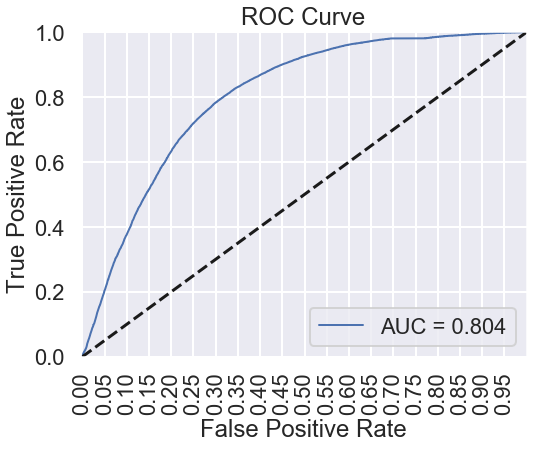

In [158]:
sns.set_context('poster')
plot_roc_curve(fpr,tpr,label='AUC = %0.3f'% auc_lr)

# Decision tree

In [159]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

In [160]:
np.random.seed(25)
import random
random.seed(25)

In [161]:
data = pd.read_csv('Final_ADS.csv')
df = data.copy()
df.head()

,Unnamed: 0,CUSTOMER_ID,HISTORIC_VISITS,HISTORIC_SALES,STD_SALESAMOUNT,VARIATION_SALESAMOUNT,MAX_SALESAMOUNT,MIN_SALESAMOUNT,W1_HISTORIC_VISITS,W2_HISTORIC_VISITS,...,W4_MIN_SALESAMOUNT,W5_MIN_SALESAMOUNT,W1_MAX_SALESAMOUNT,W2_MAX_SALESAMOUNT,W3_MAX_SALESAMOUNT,W4_MAX_SALESAMOUNT,W5_MAX_SALESAMOUNT,CHURN,FIRST_VISIT_DAY,LAST_VISIT_DAY
0,0,488,1.0,5.148657,0.000000,0.00000,5.148657,5.148657,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,5.148657,0.000000,0.000000,1,16,16
1,1,5194,1.0,6.397263,0.000000,0.00000,6.397263,6.397263,0.0,1.0,...,0.000000,0.000000,0.000000,6.397263,0.000000,0.000000,0.000000,1,10,10
2,2,5398,2.0,4.641695,0.000000,0.00000,3.958143,3.958143,0.0,1.0,...,3.958143,0.000000,0.000000,3.958143,0.000000,3.958143,0.000000,0,26,12
3,3,6930,6.0,6.397263,3.582019,7.10843,5.148657,4.461300,1.0,2.0,...,4.461300,0.000000,4.461300,5.148657,4.461300,4.461300,0.000000,0,24,4
4,4,7260,14.0,7.585687,3.988061,7.93906,5.552184,4.241039,4.0,3.0,...,4.461300,5.148657,5.148657,5.148657,5.552184,5.148657,5.148657,0,30,0


In [162]:
df_OneHot=pd.get_dummies(df)

In [163]:
df_OneHot.head()

,Unnamed: 0,CUSTOMER_ID,HISTORIC_VISITS,HISTORIC_SALES,STD_SALESAMOUNT,VARIATION_SALESAMOUNT,MAX_SALESAMOUNT,MIN_SALESAMOUNT,W1_HISTORIC_VISITS,W2_HISTORIC_VISITS,...,W4_MIN_SALESAMOUNT,W5_MIN_SALESAMOUNT,W1_MAX_SALESAMOUNT,W2_MAX_SALESAMOUNT,W3_MAX_SALESAMOUNT,W4_MAX_SALESAMOUNT,W5_MAX_SALESAMOUNT,CHURN,FIRST_VISIT_DAY,LAST_VISIT_DAY
0,0,488,1.0,5.148657,0.000000,0.00000,5.148657,5.148657,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,5.148657,0.000000,0.000000,1,16,16
1,1,5194,1.0,6.397263,0.000000,0.00000,6.397263,6.397263,0.0,1.0,...,0.000000,0.000000,0.000000,6.397263,0.000000,0.000000,0.000000,1,10,10
2,2,5398,2.0,4.641695,0.000000,0.00000,3.958143,3.958143,0.0,1.0,...,3.958143,0.000000,0.000000,3.958143,0.000000,3.958143,0.000000,0,26,12
3,3,6930,6.0,6.397263,3.582019,7.10843,5.148657,4.461300,1.0,2.0,...,4.461300,0.000000,4.461300,5.148657,4.461300,4.461300,0.000000,0,24,4
4,4,7260,14.0,7.585687,3.988061,7.93906,5.552184,4.241039,4.0,3.0,...,4.461300,5.148657,5.148657,5.148657,5.552184,5.148657,5.148657,0,30,0


In [164]:
df=df_OneHot.copy()

In [165]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8,6))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc='best')

In [186]:
df.columns

Index(['Unnamed: 0', 'CUSTOMER_ID', 'HISTORIC_VISITS', 'HISTORIC_SALES',
       'STD_SALESAMOUNT', 'VARIATION_SALESAMOUNT', 'MAX_SALESAMOUNT',
       'MIN_SALESAMOUNT', 'W1_HISTORIC_VISITS', 'W2_HISTORIC_VISITS',
       'W3_HISTORIC_VISITS', 'W4_HISTORIC_VISITS', 'W5_HISTORIC_VISITS',
       'W1_HISTORIC_SALES', 'W2_HISTORIC_SALES', 'W3_HISTORIC_SALES',
       'W4_HISTORIC_SALES', 'W5_HISTORIC_SALES', 'W1_STD_SALESAMOUNT',
       'W2_STD_SALESAMOUNT', 'W3_STD_SALESAMOUNT', 'W4_STD_SALESAMOUNT',
       'W5_STD_SALESAMOUNT', 'W1_VARIATION_SALES_AMOUNT',
       'W2_VARIATION_SALES_AMOUNT', 'W3_VARIATION_SALES_AMOUNT',
       'W4_VARIATION_SALES_AMOUNT', 'W5_VARIATION_SALES_AMOUNT',
       'W1_MIN_SALESAMOUNT', 'W2_MIN_SALESAMOUNT', 'W3_MIN_SALESAMOUNT',
       'W4_MIN_SALESAMOUNT', 'W5_MIN_SALESAMOUNT', 'W1_MAX_SALESAMOUNT',
       'W2_MAX_SALESAMOUNT', 'W3_MAX_SALESAMOUNT', 'W4_MAX_SALESAMOUNT',
       'W5_MAX_SALESAMOUNT', 'CHURN', 'FIRST_VISIT_DAY', 'LAST_VISIT_DAY'],
      dtype='obje

In [188]:
X = df.drop(['CHURN','CUSTOMER_ID','Unnamed: 0'], axis=1)
Y = df['CHURN']

In [189]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.3)
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(140000, 38) (140000,)
(60000, 38) (60000,)


In [190]:
clf_dt = DecisionTreeClassifier(criterion='gini',max_depth=3)

In [191]:
clf_dt.fit(xtrain, ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [192]:
dt_pred = clf_dt.predict(xtest)
dt_pred_prb=clf_dt.predict_proba(xtest)[:,1]

In [193]:
accuracy_dt = accuracy_score(ytest,dt_pred)
print("Accuracy: {}".format(accuracy_dt))

Accuracy: 0.72745


In [194]:
print(classification_report(ytest,dt_pred))

              precision    recall  f1-score   support

           0       0.73      0.80      0.76     33110
           1       0.72      0.64      0.68     26890

   micro avg       0.73      0.73      0.73     60000
   macro avg       0.73      0.72      0.72     60000
weighted avg       0.73      0.73      0.73     60000



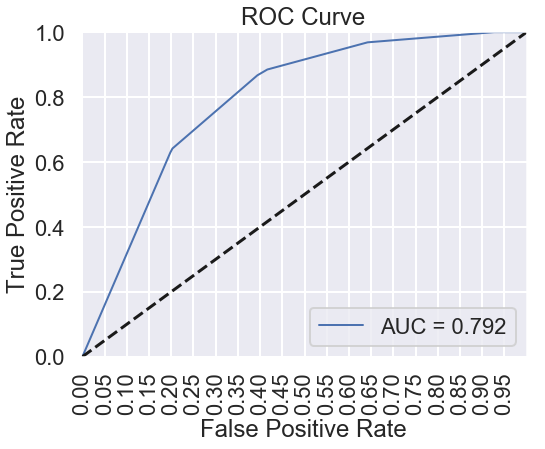

In [195]:
sns.set_context('poster')
auc_dt=roc_auc_score(ytest,dt_pred_prb)
fpr,tpr,threshold=roc_curve(ytest,dt_pred_prb)
plot_roc_curve(fpr,tpr,label='AUC = %0.3f'% auc_dt)

In [196]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

In [197]:
import os
os.environ["Path"] += os.pathsep + 'C:\Program Files (x86)\Graphviz2.38\bin'

In [198]:
dot_data = StringIO()

In [199]:
export_graphviz(clf_dt, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=list(X.columns))

In [200]:
X.columns

Index(['HISTORIC_VISITS', 'HISTORIC_SALES', 'STD_SALESAMOUNT',
       'VARIATION_SALESAMOUNT', 'MAX_SALESAMOUNT', 'MIN_SALESAMOUNT',
       'W1_HISTORIC_VISITS', 'W2_HISTORIC_VISITS', 'W3_HISTORIC_VISITS',
       'W4_HISTORIC_VISITS', 'W5_HISTORIC_VISITS', 'W1_HISTORIC_SALES',
       'W2_HISTORIC_SALES', 'W3_HISTORIC_SALES', 'W4_HISTORIC_SALES',
       'W5_HISTORIC_SALES', 'W1_STD_SALESAMOUNT', 'W2_STD_SALESAMOUNT',
       'W3_STD_SALESAMOUNT', 'W4_STD_SALESAMOUNT', 'W5_STD_SALESAMOUNT',
       'W1_VARIATION_SALES_AMOUNT', 'W2_VARIATION_SALES_AMOUNT',
       'W3_VARIATION_SALES_AMOUNT', 'W4_VARIATION_SALES_AMOUNT',
       'W5_VARIATION_SALES_AMOUNT', 'W1_MIN_SALESAMOUNT', 'W2_MIN_SALESAMOUNT',
       'W3_MIN_SALESAMOUNT', 'W4_MIN_SALESAMOUNT', 'W5_MIN_SALESAMOUNT',
       'W1_MAX_SALESAMOUNT', 'W2_MAX_SALESAMOUNT', 'W3_MAX_SALESAMOUNT',
       'W4_MAX_SALESAMOUNT', 'W5_MAX_SALESAMOUNT', 'FIRST_VISIT_DAY',
       'LAST_VISIT_DAY'],
      dtype='object')

In [201]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

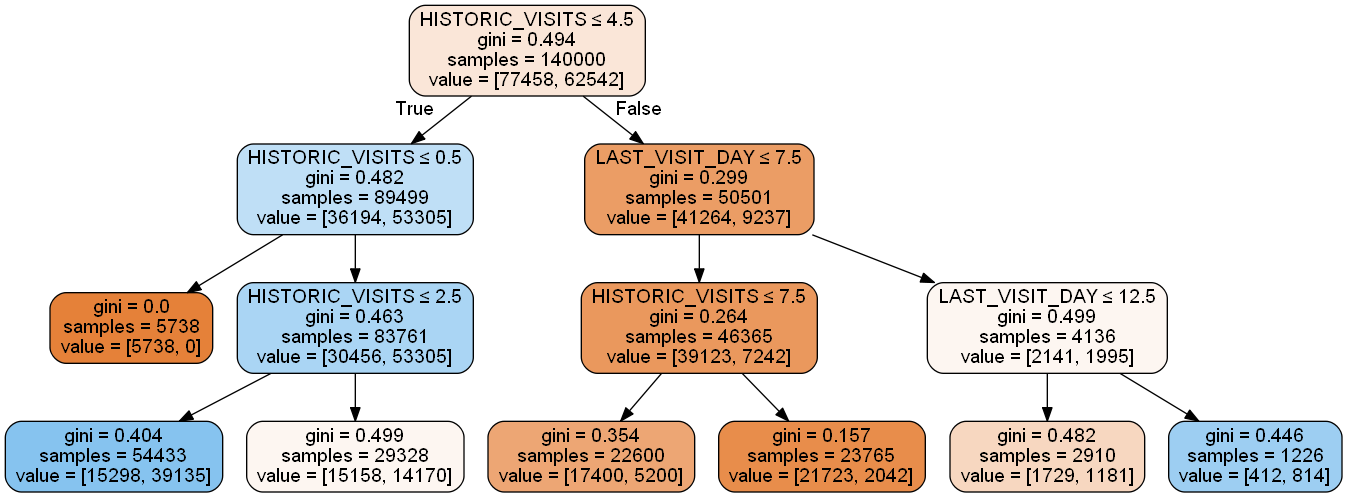

In [202]:
Image(graph.create_png())